<a href="https://colab.research.google.com/github/takter11/DataSets/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

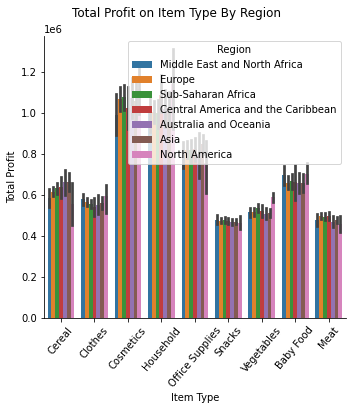

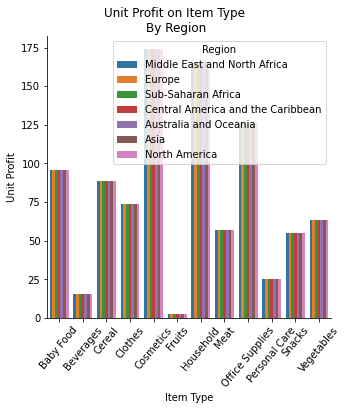

                            OLS Regression Results                            
Dep. Variable:           Total Profit   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     5551.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:49:58   Log-Likelihood:            -1.4040e+05
No. Observations:               10000   AIC:                         2.808e+05
Df Residuals:                    9998   BIC:                         2.808e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2303.3991   6079.547      0.379      0.7

Text(0, 0.5, 'Total Profit')

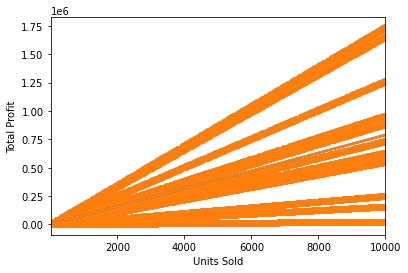

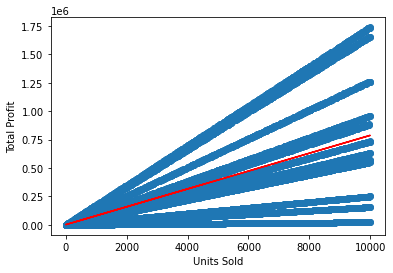

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from statsmodels.graphics.gofplots import qqplot 




missing_values=['na','N/A','NA',' ','-','--']
# Import Data
#https://github.com/CunyLaguardiaDataAnalytics/datasets/blob/master/10000%20Sales%20Records.csv
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/10000%20Sales%20Records.csv')
df
# Added a new column ' Unit Profit'
df['Unit Profit']=df['Unit Price']-df['Unit Cost']
df['Total Profit'].mean()
# Sort out the data where Total Profit grater than mean value of Total profit
HighProfit=df[(df['Total Profit']>395089.34719300084)]
# Showing Total Profit(more than average profit) by Item Type
dfitem=HighProfit.groupby(['Country','Item Type','Region'])['Total Profit'].mean().reset_index()
g1 = sns.catplot(x='Item Type', y='Total Profit', hue='Region',
                                 data=dfitem, kind='bar',palette=sns.color_palette(),  legend_out=False)
plt.subplots_adjust(top=.9)
g1.fig.suptitle('Total Profit on Item Type By Region')
g1.set_xticklabels(rotation=50)
g1.set_axis_labels('Item Type')
plt.show(g1)
# Comments: Total Profit perspective, 'Household' is our most profitable item type and region is 'Sub Saharan Africa',
           # Second highest profitable item is 'Cosmetics' and region is 'Europe'.

# Now I want to see profitable item type on unit profit by region
dfunitprofit=df.groupby(['Country','Item Type','Region'])['Unit Profit'].mean().reset_index()
g2 = sns.catplot(x='Item Type', y='Unit Profit', hue='Region',
                                 data=dfunitprofit, kind='bar',palette=sns.color_palette(),  legend_out=False)
plt.subplots_adjust(top=.9)
g2.fig.suptitle('Unit Profit on Item Type \nBy Region')
g2.set_xticklabels(rotation=50)
g2.set_axis_labels('Item Type')
plt.show(g2)
# Comments: Unit Profit perspective, Our most profitable item is 'Cosmetics' and region is 'Europe' and 
            #second highest profitable item is 'Household' and region is 'Sub Saharan Africa'

df

#from interactiveplot import plot_ss
df['Total Profit'].corr(df['Units Sold'])
#plot_ss(df['Units Sold'], df['Total Profit'])
sns.scatterplot(x='Units Sold',y='Total Profit', data=df)
sns.regplot(x='Units Sold', y='Total Profit', data=df)
# Fit a linear model using statsmodels (sm) OLS method. 
model = sm.OLS(df['Total Profit'], sm.add_constant(df['Units Sold']))

#from interactiveplot import plot_ss

df['Total Profit'].corr(df['Units Sold'])
#plot_ss(df['Units Sold'], df['Total Profit'])
sns.scatterplot(x='Units Sold',y='Total Profit', data=df)
sns.regplot(x='Units Sold', y='Total Profit', data=df)
# Fit a linear model using statsmodels (sm) OLS method. 
model = sm.OLS(df['Total Profit'], sm.add_constant(df['Units Sold']))
results = model.fit()
print(results.summary())
fig = plt.figure()
g = fig.add_subplot(111)
g.plot(df['Units Sold'], results.fittedvalues, 'r')
g.scatter(df['Units Sold'], df['Total Profit'])
g.set_xlabel("Units Sold")
g.set_ylabel("Total Profit")

# There is no negative profit, so if we increase 'Unit Solds', our "total Profits" also increase.





                 

          


















